# Structure type maps

In [1]:
import numpy as np
tweb = np.load('borg_sdss_tweb.npz')

#Minimum and maximum position along the x-axis in Mpc/h
xmin=tweb['ranges'][0]
xmax=tweb['ranges'][1]

#Minimum and maximum position along the y-axis in Mpc/h
ymin=tweb['ranges'][2]
ymax=tweb['ranges'][3]

#Minimum and maximum position along the z-axis in Mpc/h
zmin=tweb['ranges'][4]
zmax=tweb['ranges'][5]

#3D probabilistic maps for T-web structures
V=tweb['voids']
S=tweb['sheets']
F=tweb['filaments']
C=tweb['clusters']

<IPython.core.display.Javascript object>


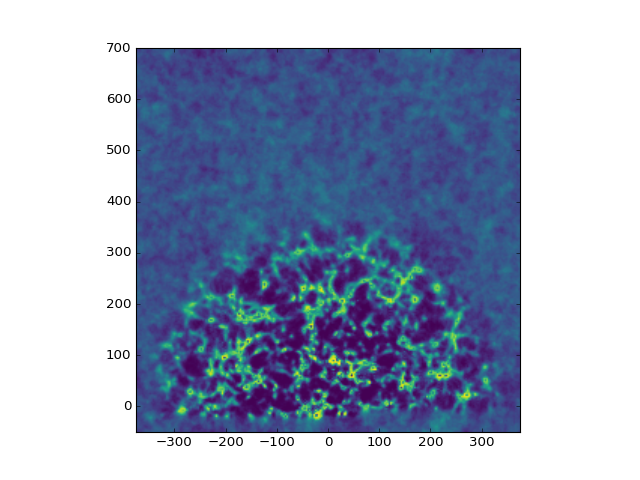

In [2]:
from matplotlib import pyplot as plt
%matplotlib notebook
plt.imshow(F[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="viridis")

# Entropy

In [3]:
import warnings
warnings.filterwarnings("ignore")

#Compute the entropy
VlogV = V*np.log2(V)
SlogS = S*np.log2(S)
FlogF = F*np.log2(F)
ClogC = C*np.log2(C)
VlogV[np.isnan(VlogV)]=0.
SlogS[np.isnan(SlogS)]=0.
FlogF[np.isnan(FlogF)]=0.
ClogC[np.isnan(ClogC)]=0.

H = - VlogV - SlogS - FlogF - ClogC

<IPython.core.display.Javascript object>


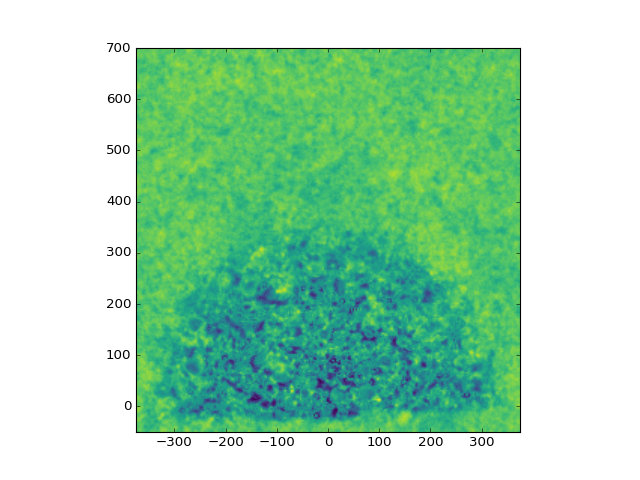

In [4]:
#Now make a example plot
plt.imshow(H[:,:,128],origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="viridis")

# Information gain (Kullback-Leibler divergence)

In [5]:
#Prior probabilities (numbers given in table II in Leclercq et al. 2015a)
Prior_V = 0.14261
Prior_S = 0.59561
Prior_F = 0.24980
Prior_C = 0.01198

In [6]:
#Compute the Kullback-Leibler divergence
VlogV = V*np.log2(V)
SlogS = S*np.log2(S)
FlogF = F*np.log2(F)
ClogC = C*np.log2(C)
VlogV[np.isnan(VlogV)]=0.
SlogS[np.isnan(SlogS)]=0.
FlogF[np.isnan(FlogF)]=0.
ClogC[np.isnan(ClogC)]=0.

VlogPrior_V = V*np.log2(Prior_V)
SlogPrior_S = S*np.log2(Prior_S)
FlogPrior_F = F*np.log2(Prior_F)
ClogPrior_C = C*np.log2(Prior_C)

DKL = VlogV + SlogS + FlogF + ClogC - VlogPrior_V - SlogPrior_S - FlogPrior_F - ClogPrior_C

<IPython.core.display.Javascript object>


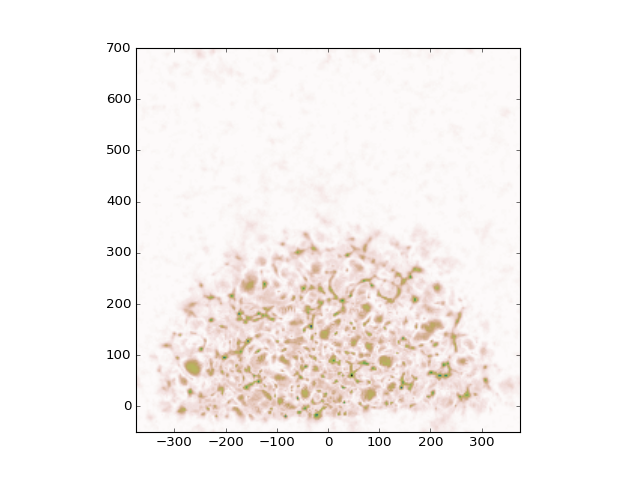

In [7]:
#Now make a example plot
plt.imshow(DKL[:,:,128],origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="gist_earth_r")

# Decision theory (Leclercq et al. 2015, arXiv:1503.00730)

In [8]:
#3D probabilistic maps for T-web structures
Posterior_l0=tweb['voids']
Posterior_l1=tweb['sheets']
Posterior_l2=tweb['filaments']
Posterior_l3=tweb['clusters']

In [9]:
#Prior probabilities (numbers given in table II in Leclercq et al. 2015a)
Prior_l0 = 0.14261
Prior_l1 = 0.59561
Prior_l2 = 0.24980
Prior_l3 = 0.01198

In [10]:
#Decision theory framework introduced in Leclercq et al. (2015b)
alpha = 1.5	# The free parameter here corresponding to the "cost of the game"

G_a0l0 = 1./Prior_l0-alpha
G_awl0 = -alpha
G_a4l0 = 0.

G_a1l1 = 1./Prior_l1-alpha
G_awl1 = -alpha
G_a4l1 = 0.

G_a2l2 = 1./Prior_l2-alpha
G_awl2 = -alpha
G_a4l2 = 0.

G_a3l3 = 1./Prior_l3-alpha
G_awl3 = -alpha
G_a4l3 = 0.

# define the utility functions
U_a0 = G_a0l0*Posterior_l0 + G_awl1*Posterior_l1 + G_awl2*Posterior_l2 + G_awl3*Posterior_l3
U_a1 = G_awl0*Posterior_l0 + G_a1l1*Posterior_l1 + G_awl2*Posterior_l2 + G_awl3*Posterior_l3
U_a2 = G_awl0*Posterior_l0 + G_awl1*Posterior_l1 + G_a2l2*Posterior_l2 + G_awl3*Posterior_l3
U_a3 = G_awl0*Posterior_l0 + G_awl1*Posterior_l1 + G_awl3*Posterior_l2 + G_a3l3*Posterior_l3
U_a4 = G_a4l0*Posterior_l0 + G_a4l1*Posterior_l1 + G_a4l2*Posterior_l2 + G_a4l3*Posterior_l3

# make the decision maximizing the utility function
MAP = np.copy(U_a4)
MAP[np.where((U_a0>U_a1) * (U_a0>U_a2) * (U_a0>U_a3) * (U_a0>U_a4))] = 0.; #voids
MAP[np.where((U_a1>U_a0) * (U_a1>U_a2) * (U_a1>U_a3) * (U_a1>U_a4))] = 1.; #sheets
MAP[np.where((U_a2>U_a0) * (U_a2>U_a1) * (U_a2>U_a3) * (U_a2>U_a4))] = 2.; #filaments
MAP[np.where((U_a3>U_a0) * (U_a3>U_a1) * (U_a3>U_a2) * (U_a3>U_a4))] = 3.; #clusters
MAP[np.where((U_a4>=U_a0) * (U_a4>=U_a1) * (U_a4>=U_a2) * (U_a4>=U_a3))] = -1.; #undecided

<IPython.core.display.Javascript object>


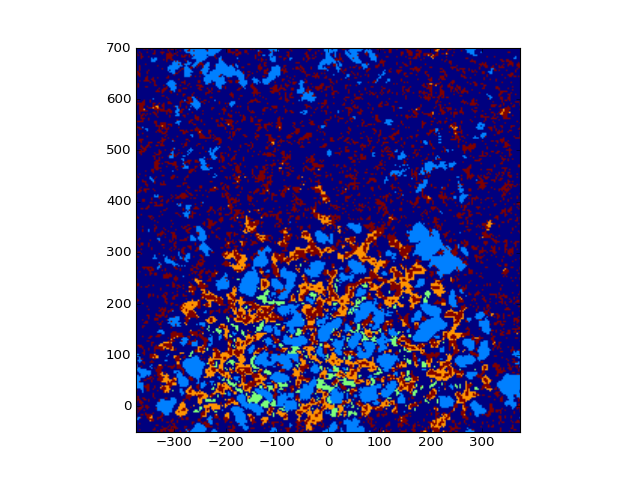

In [11]:
#Now make a example plot
plt.imshow(MAP[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax])